In [67]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [68]:
im_shape = (150,150)

TRAINING_DIR = '/content/drive/MyDrive/project cuoi ky/Train'
TEST_DIR = '/content/drive/MyDrive/project cuoi ky/Test'

seed = 10

BATCH_SIZE = 16

In [69]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [70]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [71]:
# Generator data train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator data validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 1400 images belonging to 4 classes.
Found 348 images belonging to 4 classes.
Found 588 images belonging to 4 classes.
Classes: ['Banana', 'Mangostan', 'Orange', 'Tomato']


In [72]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 flatten_6 (Flatten)         (None, 331776)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               42467456  
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                      

In [73]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=4,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/4
87/87 [==============================] - 11s 122ms/step - loss: 0.7263 - accuracy: 0.9314 - val_loss: 0.0124 - val_accuracy: 0.9970
Epoch 2/4
87/87 [==============================] - 10s 119ms/step - loss: 9.3199e-04 - accuracy: 1.0000 - val_loss: 1.4533e-04 - val_accuracy: 1.0000
Epoch 3/4
87/87 [==============================] - 10s 120ms/step - loss: 1.6131e-04 - accuracy: 1.0000 - val_loss: 4.9313e-05 - val_accuracy: 1.0000
Epoch 4/4
87/87 [==============================] - 10s 119ms/step - loss: 0.0892 - accuracy: 0.9819 - val_loss: 0.0753 - val_accuracy: 0.9702


In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [74]:
model.save('model5.h5')

In [92]:
model5 = tf.keras.models.load_model('/content/model5.h5')

orange


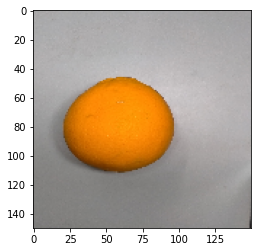

In [106]:
img=load_img('/content/drive/MyDrive/project cuoi ky/cam3.jpg',target_size=(150,150))
image=img
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]
if(np.argmax(model5.predict(img),axis=1)[0]==2):
  result=1
  print("orange")
else:
  result=0
  print("Other fruit")

In [107]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

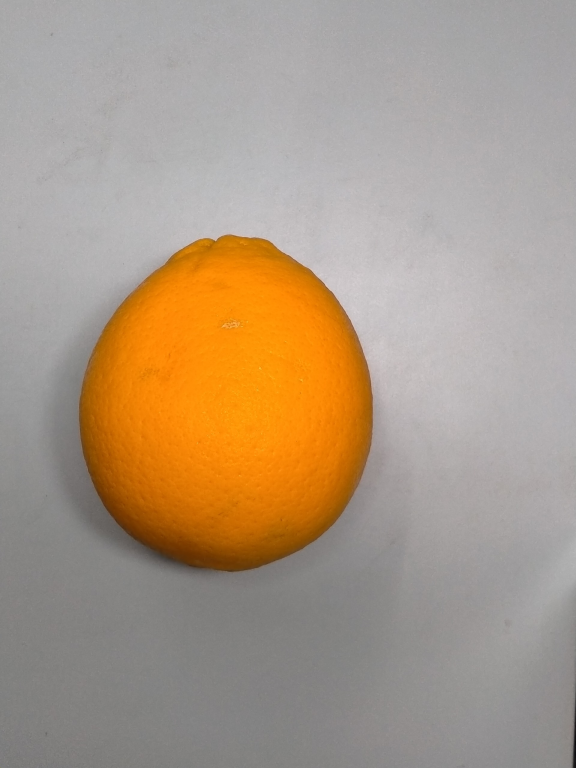

In [108]:
if result==1:
  image = cv.imread("/content/drive/MyDrive/project cuoi ky/cam3.jpg")
  width, height = int(image.shape[1]*0.3), int(image.shape[0]*0.3)
  resized_img = cv.resize(image, (width, height), interpolation = cv.INTER_AREA,)
  cv2_imshow(resized_img)
else:
  print("other fruit")

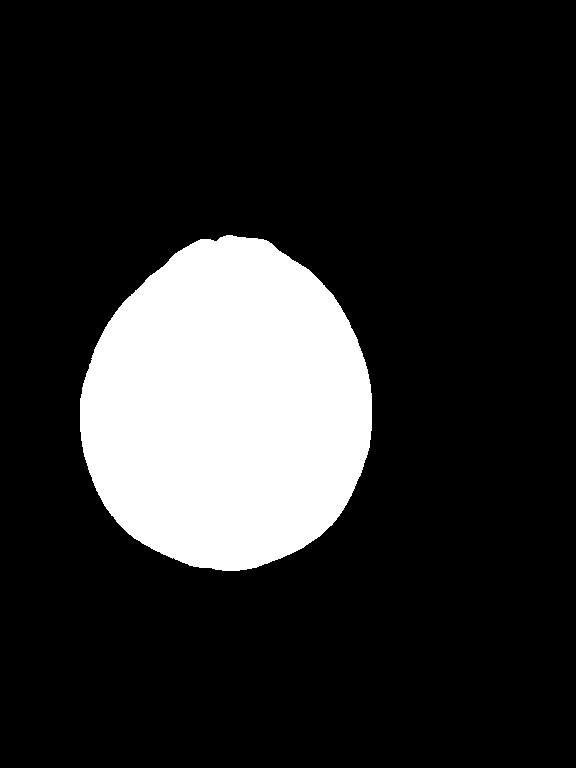

In [109]:
if result==1:
  ##convert image to HSV
  image_hsv = cv.cvtColor(resized_img,cv.COLOR_BGR2HSV)
  ##choose color HSV, 
  low_h=10
  high_h=25
  low_s=150
  high_s=255
  low_v=20
  high_v=255
  #binary to image
  b_img = cv.inRange(image_hsv, (low_h, low_s, low_v), (high_h, high_s, high_v))
  cv2_imshow(b_img)
else:
  print("other fruit")

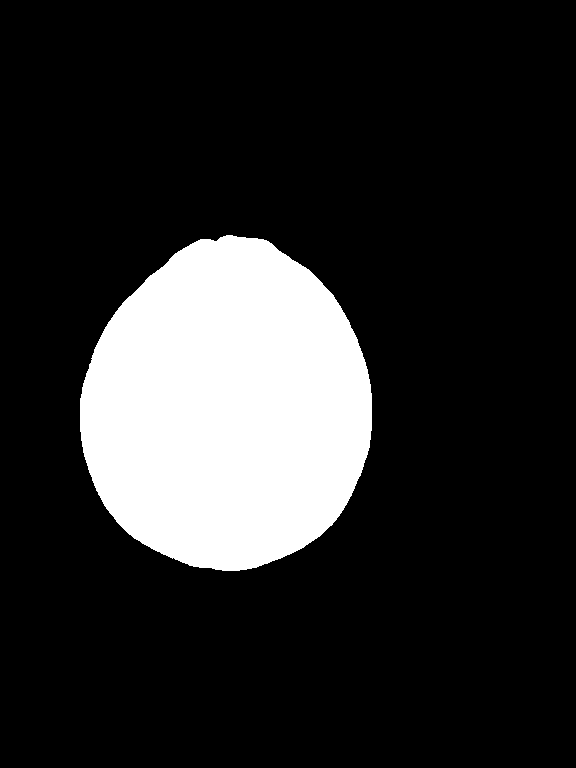

In [110]:
 # morpho để khử nhiễu
if result==1:
  kn = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3)) ##ma tran vuong
  m_img = cv.morphologyEx(b_img, cv.MORPH_OPEN, kn, iterations=1)
  m_img = cv.morphologyEx(m_img, cv.MORPH_CLOSE, kn, iterations=1)
  cv2_imshow(m_img)

In [111]:
 ## tìm đường số lượng contour
  # function find contours in binary image
  #RETR_EXTERNAL: lay duong bao ngoai
if result==1:
  contour, hie = cv.findContours(m_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  print(len(contour))

1


ban kinh qua cam= 50.1 mm


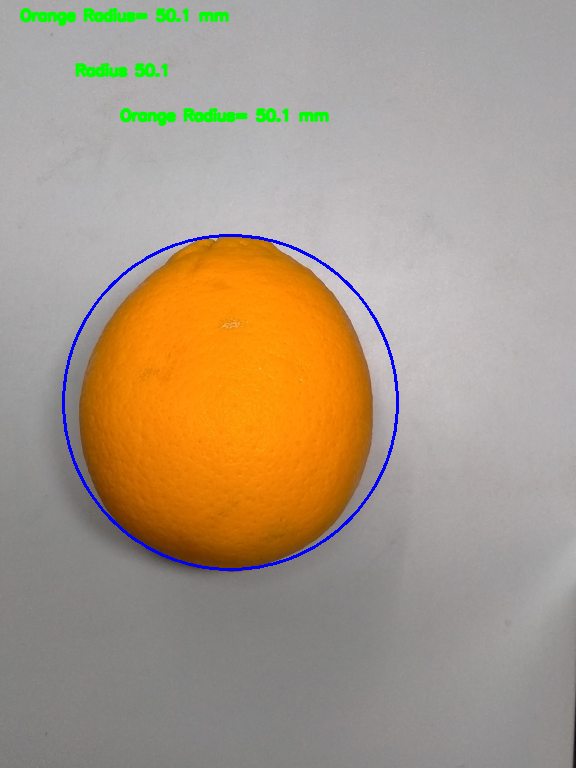

In [114]:
if result==1:
  for c in contour:
    (x, y), radius = cv.minEnclosingCircle(c)
    cirlearea = np.pi * (radius ** 2)
    area = cv.contourArea(c)
    if (1 - area / cirlearea) < 0.4:
      center = (int(x), int(y))
      radius = int(radius)
      cv.circle(resized_img, center, radius, (255, 0, 0), 2)
      radius1=radius*0.3
      print('ban kinh qua cam=',radius*0.3,'mm')
      font = cv.FONT_HERSHEY_SIMPLEX
      org = (120, 120)
      fontScale = 1.5
      color = (0, 255, 0)
      thickness = 2
      text =  ('Orange Radius= '+ str(radius*0.3) +' mm')
      cv.putText(resized_img, text ,org, font,fontScale/3, color, thickness, cv.LINE_AA)

  cv2_imshow(resized_img)